In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ds = pd.read_csv("train_housing.csv", usecols=['BsmtQual', 'FireplaceQu', 'SalePrice'])

In [4]:
ds.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [5]:
# lets check the missing values
ds.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

### Note
Imputation should be done in train as well as test set. For now we will consider only the training set.

The variable BsmtQual contains only a few observations with NA (2.5), therefore, replacing those observations with the value of the most frequent category is a good approach.

On the other hand, the variable FireplaceQu, contains missing data in almost half of the observations. Therefore, replacing those with the most frequent category is most likely going to distort the relationship of the most frequent category with the sale price.

In addition, if so many observations in FireplaceQu are missing, it could be for a reason and not just at random, so we could be better off capturing that somehow with a different imputation technique. For now, let's explore the effect of replacing NA by the most frequent categories when missing data is few or a lot.

In [8]:
# lets get the percentage of missing value in 'BsmtQual' columns
ds['BsmtQual'].isnull().mean()

0.025342465753424658

In [9]:
# lets calculate the number of observations per category in BsmtQual
ds['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

Text(0, 0.5, 'Number of houses')

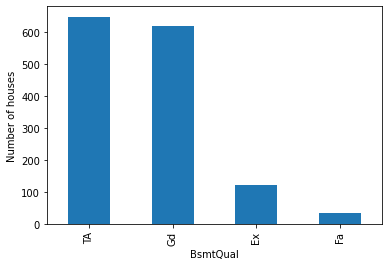

In [12]:
# let's observe the number of observations per category in BsmtQual
ds['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

In [13]:
# Let's find the most frequent category for BsmtQual
ds['BsmtQual'].mode()

0    TA
dtype: object

Text(0.5, 1.0, 'BsmtQual')

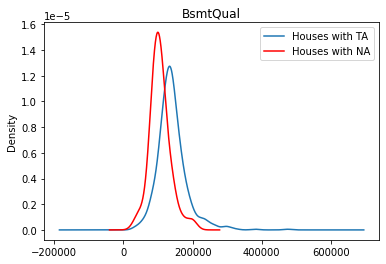

In [15]:
# let's compare the distribution of the target for the houses that shows the 
# most frequent category and that shows the missing data

fig = plt.figure()
ax = fig.add_subplot(111)

# select the most frequent label and plot it's distribution 
ds[ds['BsmtQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

# select the missing values and plot it's distribution 
ds[ds['BsmtQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NAN']
ax.legend(lines, labels, loc='best')

# add figure title
plt.title('BsmtQual')

The plot above indicates that the houses with missing data cost overall less than those with the label TA. Therefore, replacing missing values by TA, could affect the overall distribution, if there were a lot of NAN.

In [19]:
# lets store the original distribution of the SalePrice in a temorary
# variable.
# This is to compare the distribution of the SalePrice after and
# before imputation


tmp = ds[ds['BsmtQual']=='TA']['SalePrice']

In [20]:
# Let's handle the missing value with the most frequent label
ds['BsmtQual'].fillna('TA', inplace=True)

In [22]:
# lets print the dataset
ds.head(10)

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000
5,Gd,NaN,143000
6,Ex,Gd,307000
7,Gd,TA,200000
8,TA,TA,129900
9,TA,TA,118000


In [23]:
# Let's check the process

ds['BsmtQual'].isnull().sum()

0

Text(0, 0.5, 'Number of houses')

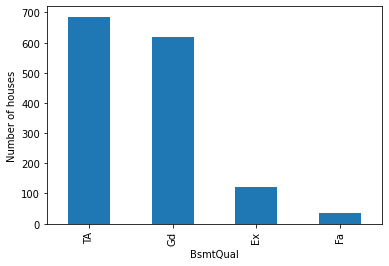

In [24]:
# lets compare the effect of imputation on the distribution of data

ds['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

From the plot, we can see that there are few more houses having label TA than the original dataset, but the overall effect on the distribution is not compromised/distorted. The plot's before and after imputation looks almost similar..

Text(0.5, 1.0, 'FireplaceQu')

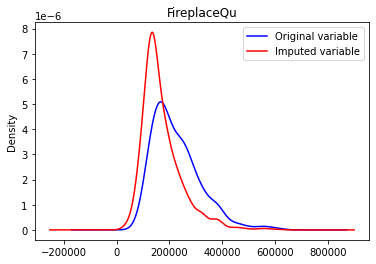

In [39]:
# Now lets check whether the distribution of the SalePrice for the most 
# frequent category changed or not.

fig = plt.figure()
ax = fig.add_subplot(111)

# original distribution of salePrice for houses with most frequent label
tmp.plot(kind='kde', ax=ax, color="blue")

# distribution of the salePrice after imputation
ds[ds['FireplaceQu'] == 'Gd']['SalePrice'].plot(
    kind='kde', ax=ax, color='red')

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

The average house value for the most frequent category has decreased quite dramatically after adding the house values of the NA, following the re-categorisation of NA as the most frequent label.

Thus, the importance of this particular label for the prediction of house prices is masked or changed by the addition of missing values.

In cases like this, when the percentage of missing values is so high (50%), we are better off creating a new category to enclose the observations with NA.

**Now lets see the effect of Frequent Count Imputation on the feature having high percentage of missing values**

For this we take 'FirePlaceQu' Feature from the above dataset.

In [27]:
# let's again check the percentage of null values for this feature
ds['FireplaceQu'].isnull().mean()

0.4726027397260274

Text(0, 0.5, 'Number of houses')

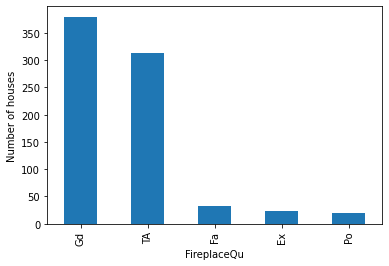

In [29]:
# let's observe the number of observations per category

ds['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

In [30]:
# Finding the most frequent word
ds['FireplaceQu'].mode()


0    Gd
dtype: object

Text(0.5, 1.0, 'FireplaceQu')

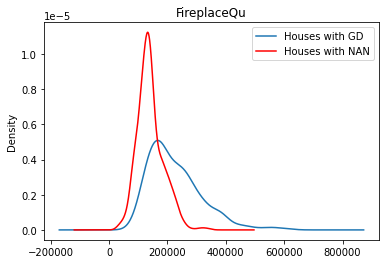

In [32]:
# let's compare the distribution of the target for the houses that shows the 
# most frequent category and that shows the missing data

fig = plt.figure()
ax = fig.add_subplot(111)

# select the most frequent label and plot it's distribution 
ds[ds['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

# select the missing values and plot it's distribution 
ds[ds['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with GD', 'Houses with NAN']
ax.legend(lines, labels, loc='best')

# add figure title
plt.title('FireplaceQu')

The distributions are quite different, houses with missing data cost overall less than those with the label Gd.



In [35]:
# lets store the original distribution of the SalePrice in a temorary
# variable.
# This is to compare the distribution of the SalePrice after and
# before imputation


tmp = ds[ds['FireplaceQu']=='Gd']['SalePrice']

In [37]:
# Let's fill NaN values

ds['FireplaceQu'].fillna('Gd', inplace=True)

Text(0, 0.5, 'Number of houses')

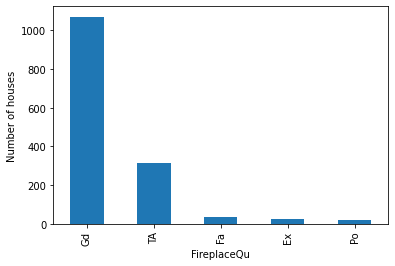

In [38]:
# let's observe the number of observations per category after imputation

ds['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

In this case, we see a large distortion in the original distribution of the variable. Now we have a lot more houses that contain the variable Gd, compared to the houses that show the other variables. Originally, half of the observations in FirePlaceQu were missing. Now, all of those values contain Gd. That is why we observe a big increase in Gd in the bar plot.

Text(0.5, 1.0, 'FireplaceQu')

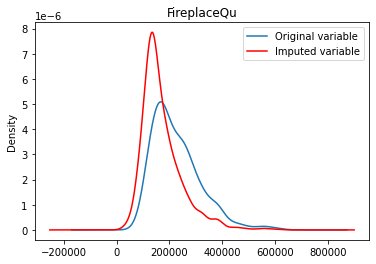

In [41]:
# let's compare the distribution of the target for the houses that shows the 
# most frequent category and that shows the missing data

fig = plt.figure()
ax = fig.add_subplot(111)

# select the most frequent label and plot it's distribution 
tmp.plot(kind='kde', ax=ax)

# select the missing values and plot it's distribution 
ds[ds['FireplaceQu'] == 'Gd']['SalePrice'].plot(
    kind='kde', ax=ax, color='red')
# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add figure title
plt.title('FireplaceQu')

The average house value for the most frequent category has decreased quite dramatically after adding the house values of the NA, following the re-categorisation of NA as the most frequent label.

Thus, the importance of this particular label for the prediction of house prices is masked or changed by the addition of missing values.

In cases like this, when the percentage of missing values is so high (50%), we are better off creating a new category to enclose the observations with NA.

Now we have to do the same steps for test set as well.